# Projeto: Doenças Cardíacas

Alunos:
- João Pedro Buzzo Silva - 10425191
- Victor Hugo Trigolo Amaral - 12688487



### Links para o dataset
- https://archive.ics.uci.edu/dataset/45/heart+disease
- https://www.kaggle.com/datasets/ineubytes/heart-disease-dataset

# Configuração do ambiente

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importação dos arquivos

In [ ]:
# Função para leitura correta dos dados
def import_data(path):
  # Trecho constante do caminho dos arquivos. Apenas concatenamos o nome do arquivo
  # desejado na leitura.
  # Buzzo: /content/drive/MyDrive/ICD - Trabalhos/Projeto/
  # Amaral: /content/drive/MyDrive/ICD/Projeto/
  pre_path = '/content/drive/MyDrive/ICD - Trabalhos/Projeto/'
  df = pd.read_csv(pre_path + path + '.data', delimiter=',', header=None)

  # Como os dados faltantes são representados por '?' e todos os dados são numéricos
  # (incluindo os categóricos), substituímos por NaN e convertemos o tipo da coluna
  # para numérico
  df.replace('?', np.nan, inplace=True)
  df = df.apply(pd.to_numeric, errors='coerce')

  # Para cada coluna com tipo int (excluindo a última coluna que é o target)
  # convertemos o tipo para float
  for i in range(12):
    if df[i].dtype == 'int64':
      df[i] = df[i].astype('float64')

  return df

In [ ]:
columns_name = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df_clev = import_data('cleveland')
df_hung = import_data('hungarian')
df_swi = import_data('switzerland')
df_va = import_data('va')

# Concatenando os datasets
df = pd.concat([df_clev, df_hung, df_swi, df_va])

# Renomeando as colunas
df.columns = columns_name
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 107.8 KB


# Características gerais dos dados

Tipos dos dados do dataframe:

In [ ]:
df.dtypes

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


Todos os atributos são numéricos (1 float, 12 inteiros e 1 target inteiro).

Quantidade de valores nulos de cada atributo:

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalach,55
exang,55
oldpeak,62


Quantidade de valores de cada classe do target:

In [ ]:
df['target'].value_counts()

,count
target,
0,411
1,265
2,109
3,107
4,28


Repare que 0 (ausência de doença cardíaca) é a classe mais frequente, e essa frequência vai decrescendo conforme o nível da doença cardíaca aumenta.

Visualização da distribuição dos dados numéricos em boxplots:

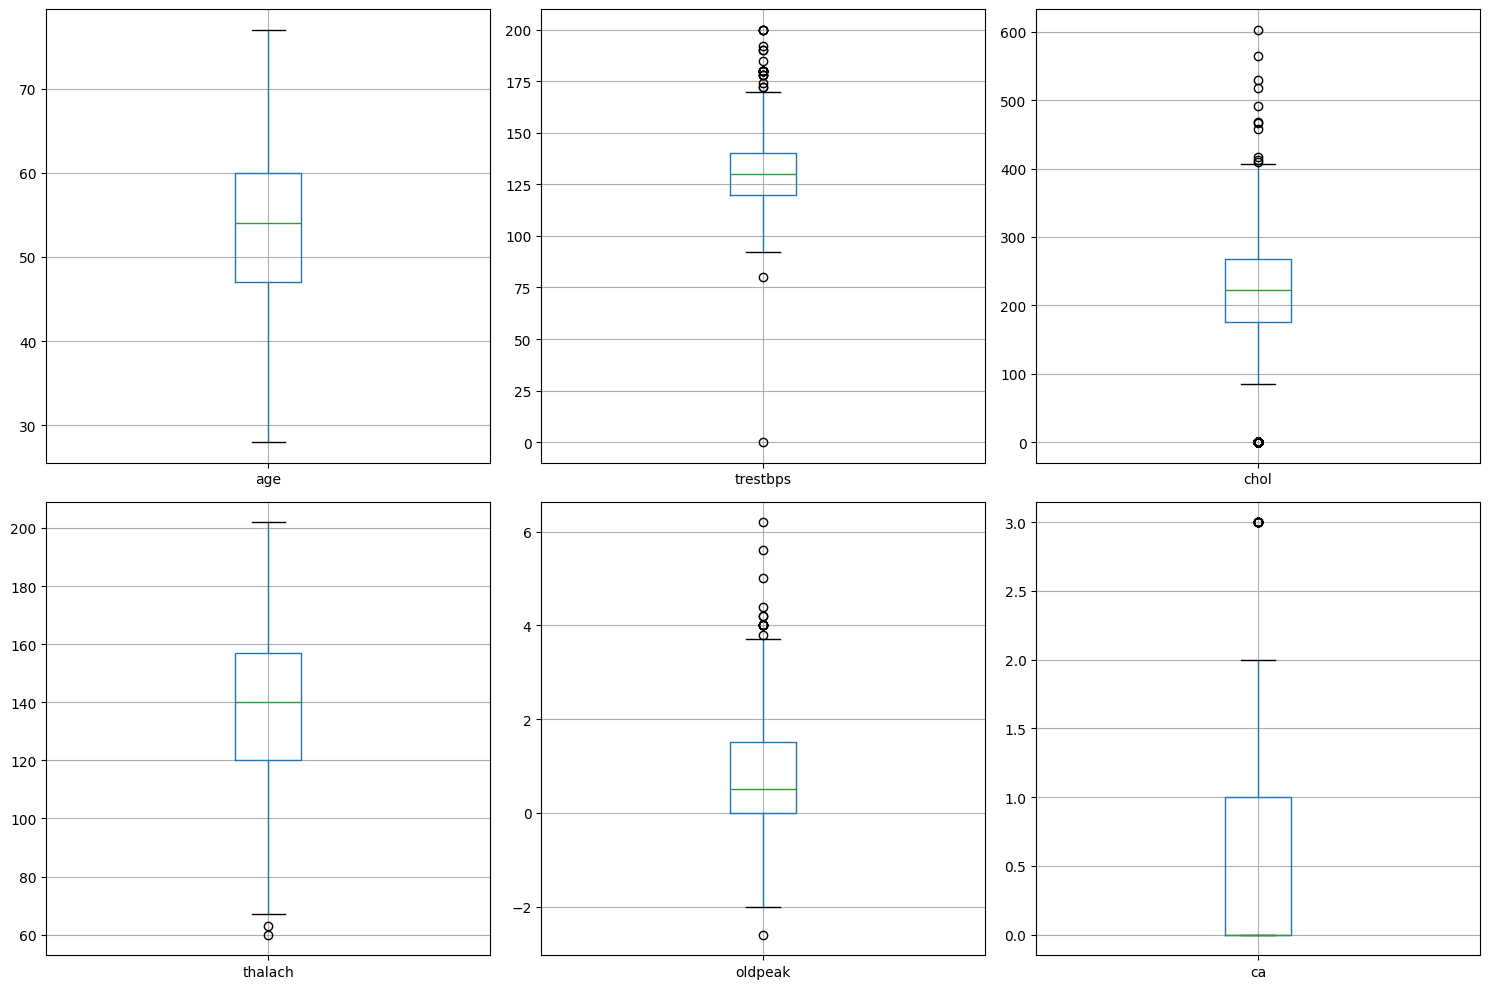

In [ ]:
# Separando colunas numéricas e categóricas
num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Boxplot das colunas numéricas
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(num_col):
  df[[col]].boxplot(ax=axs[i//3, i%3])
plt.tight_layout()
plt.show()

Visualização dos dados numéricos em histogramas:

Obliquidade de age: -0.195993861608106
Kurtosis de age: -0.3829298182845311

Obliquidade de trestbps: 0.21333446967212508
Kurtosis de trestbps: 2.958664416580538

Obliquidade de chol: -0.6138360897370758
Kurtosis de chol: 0.0622726880184552

Obliquidade de thalach: -0.21111858073161133
Kurtosis de thalach: -0.47972463236840435

Obliquidade de oldpeak: 1.0414266146339854
Kurtosis de oldpeak: 1.1270692393005994

Obliquidade de ca: 1.1659778654172832
Kurtosis de ca: 0.19949824430497376



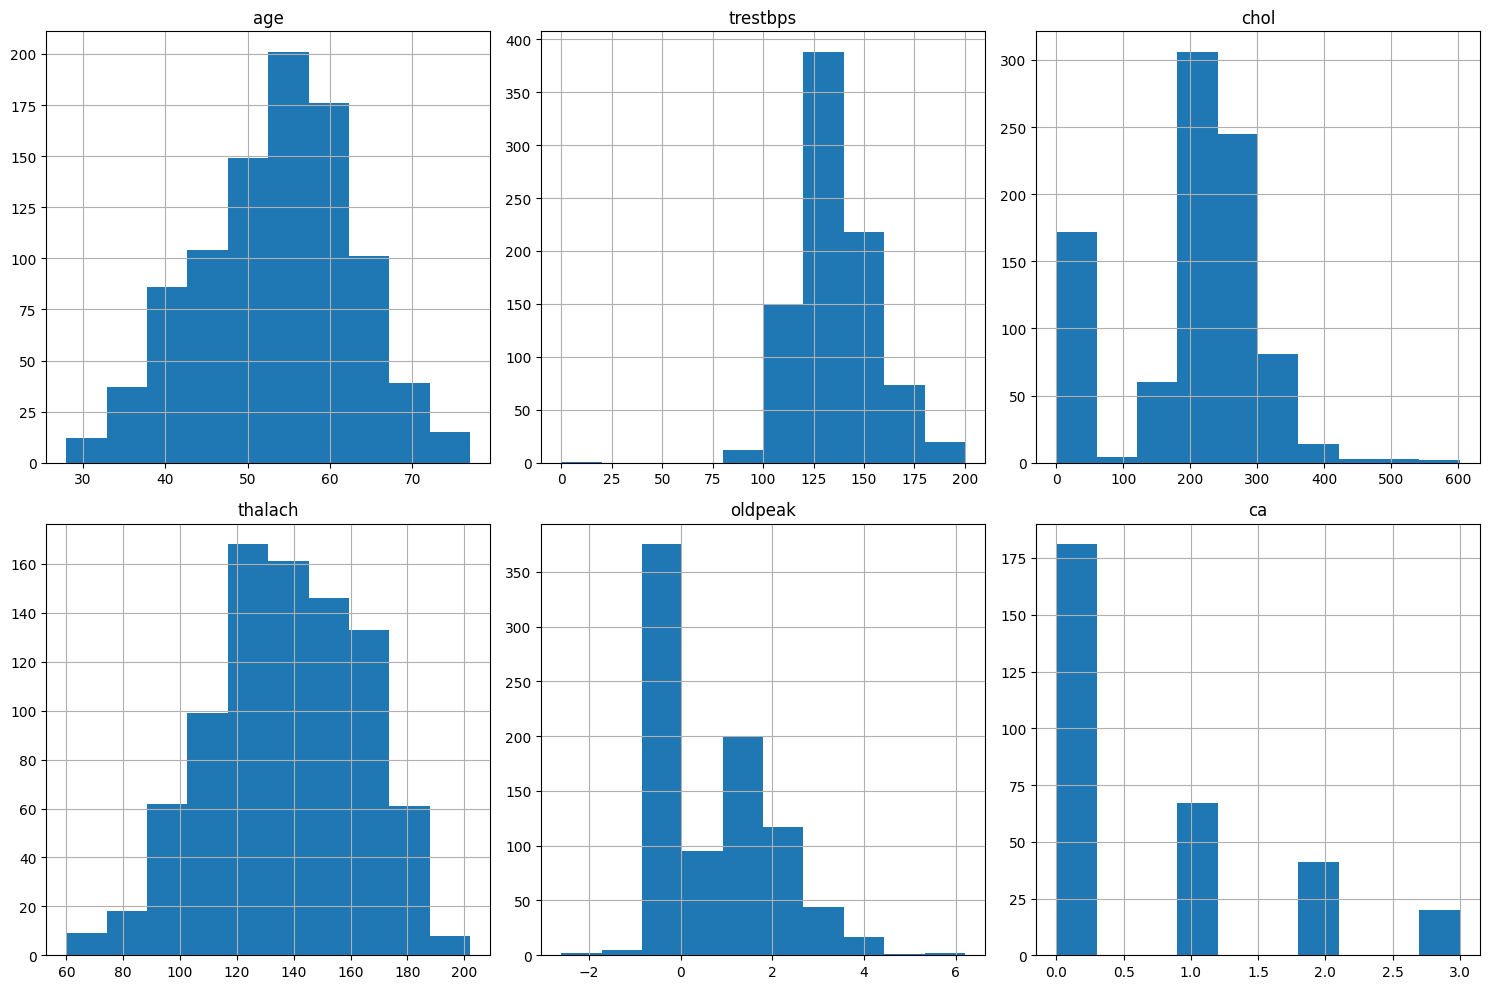

In [ ]:
# Histograma das colunas numéricas
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(num_col):
  df[[col]].hist(ax=axs[i//3, i%3])
  print(f'Obliquidade de {col}: {df[col].skew()}')
  print(f'Kurtosis de {col}: {df[col].kurtosis()}')
  print('')
plt.tight_layout()
plt.show()

Repare que o atributo numérico com obliquidade mais próxima de zero é a idade ('age'), o que se reflete em sua distribuição mais simétrica dos dados.

# Pré-Processamento

Aqui, temos uma função de pré-processamento para tratar o conjunto de dados:

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocessing(df, num_col, cat_col, treat_outlier=False):
  if df.isna().sum().sum() > 0:
    # Inputando valores nulos
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    df[num_col] = num_imputer.fit_transform(df[num_col])
    df[cat_col] = cat_imputer.fit_transform(df[cat_col])

  scaler = StandardScaler()
  df[num_col] = scaler.fit_transform(df[num_col])

  if treat_outlier:
    # Tratamento dos outliers
    for col in num_col:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1

      UB = Q3 + 1.5*IQR
      LB = Q1 - 1.5*IQR

      df[col] = df[col].apply(lambda x: UB if x > UB else x)
      df[col] = df[col].apply(lambda x: LB if x < LB else x)

  return df

Abaixo definimos o conjunto de dados sem o atributo 'ca' (mais para frente definiremos os outros conjuntos de dados com os quais lidaremos durante o trabalho):

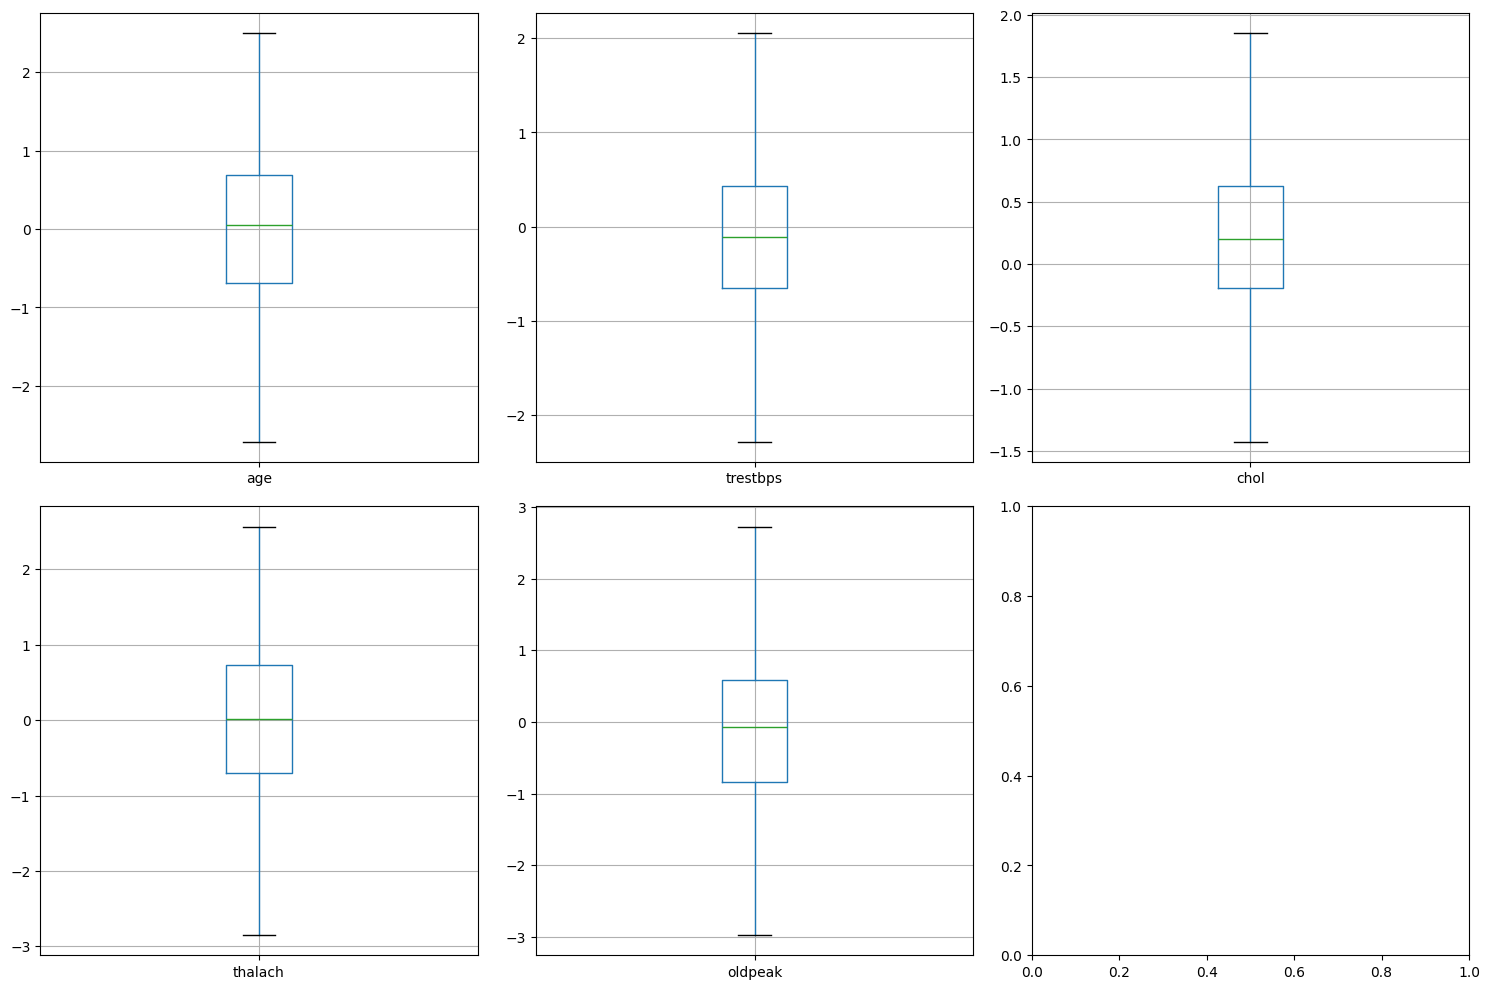

In [ ]:
# Conjunto de dados sem a coluna 'ca':
num_col_noca = num_col.copy()
num_col_noca.remove('ca')

df_noca = df.copy()
df_noca.drop('ca', axis=1, inplace=True)

# Pré-processamento do dataframe:
df_noca = preprocessing(df_noca, num_col_noca, cat_col, treat_outlier=True)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(num_col_noca):
  df_noca[[col]].boxplot(ax=axs[i//3, i%3])
plt.tight_layout()
plt.show()

Repare que ele não possui mais os outliers, pois eles foram tratados.

Abaixo definimos outro conjunto de dados, esse sem os valores nulos:

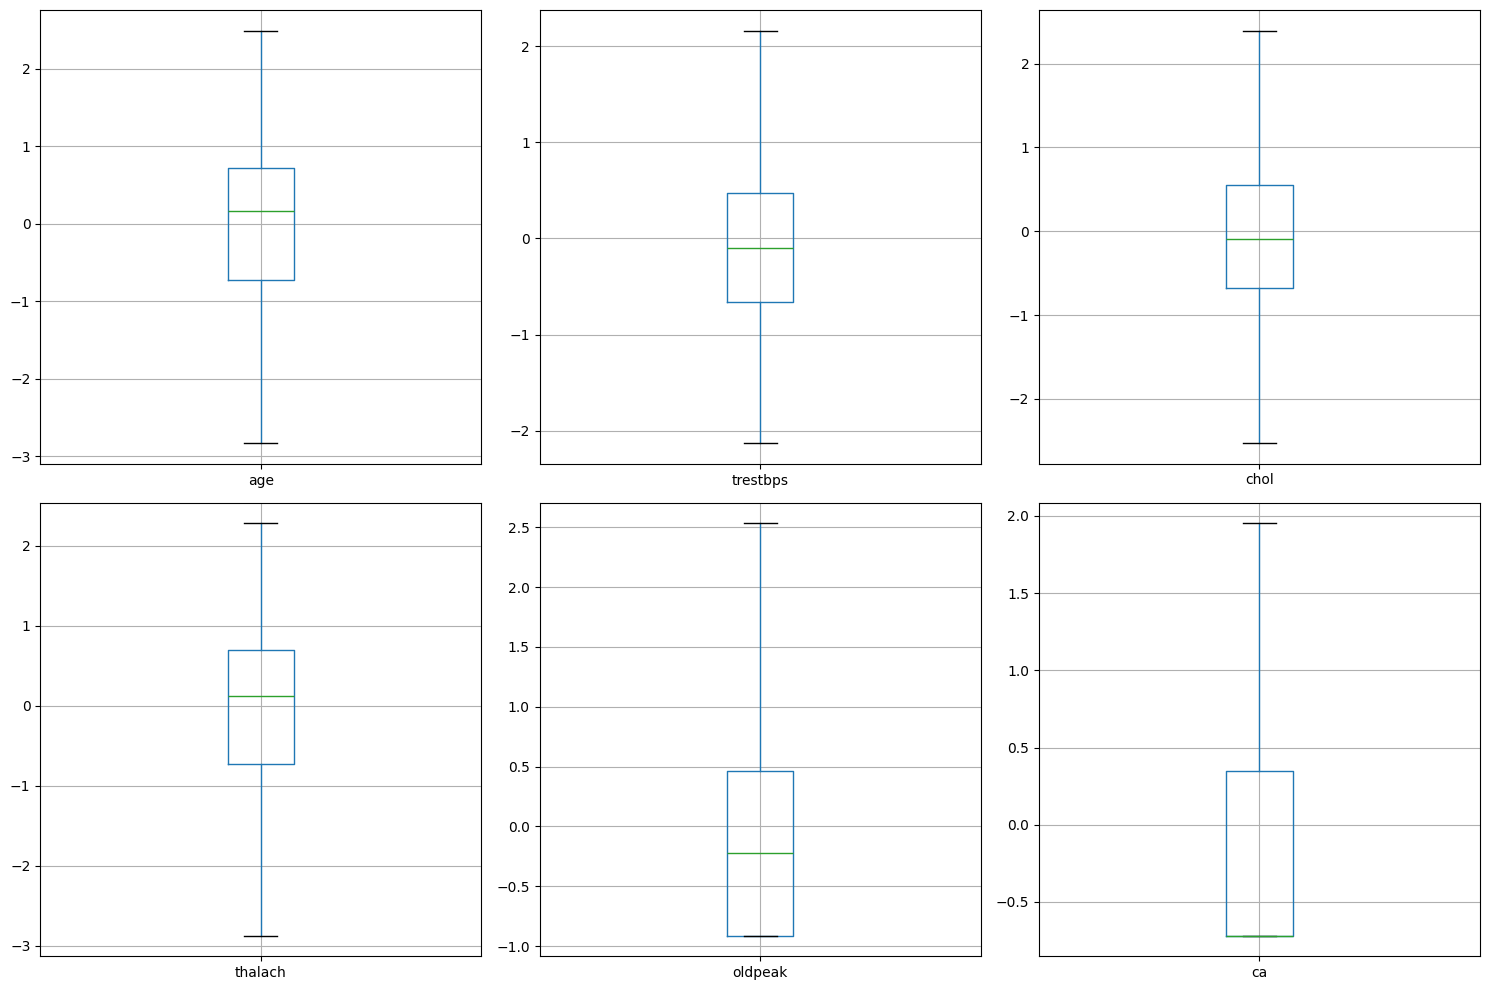

In [ ]:
# Dataset sem os objetos com valores nulos:
df_nonan = df.copy()
df_nonan = df_nonan.dropna()

# Pré-processamento:
df_nonan = preprocessing(df_nonan, num_col, cat_col, treat_outlier=True)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(num_col):
  df_nonan[[col]].boxplot(ax=axs[i//3, i%3])
plt.tight_layout()
plt.show()

# Correlação de atributos

### Para o dataframe sem o 'ca'

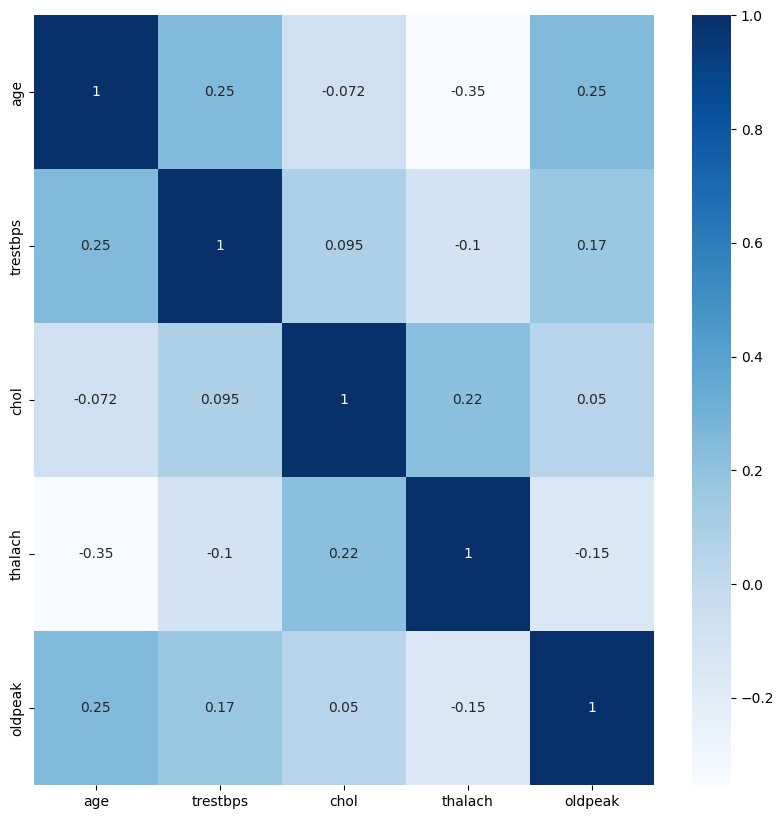

In [ ]:
X_noca = df_noca.drop('target', axis=1)
y_noca = df_noca['target']

num_col_noca = num_col.copy()
num_col_noca.remove('ca')

fig = plt.figure(figsize=(10, 10))
datacorr = sns.heatmap(X_noca[num_col_noca].corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

Aparentemente, de acordo com a matriz de correlação, não há nenhuma dupla de atributos fortemente correlacionados (módulo da correlação > 0.5) no dataset sem a coluna 'ca'.

### Para o dataframe sem valores nulos

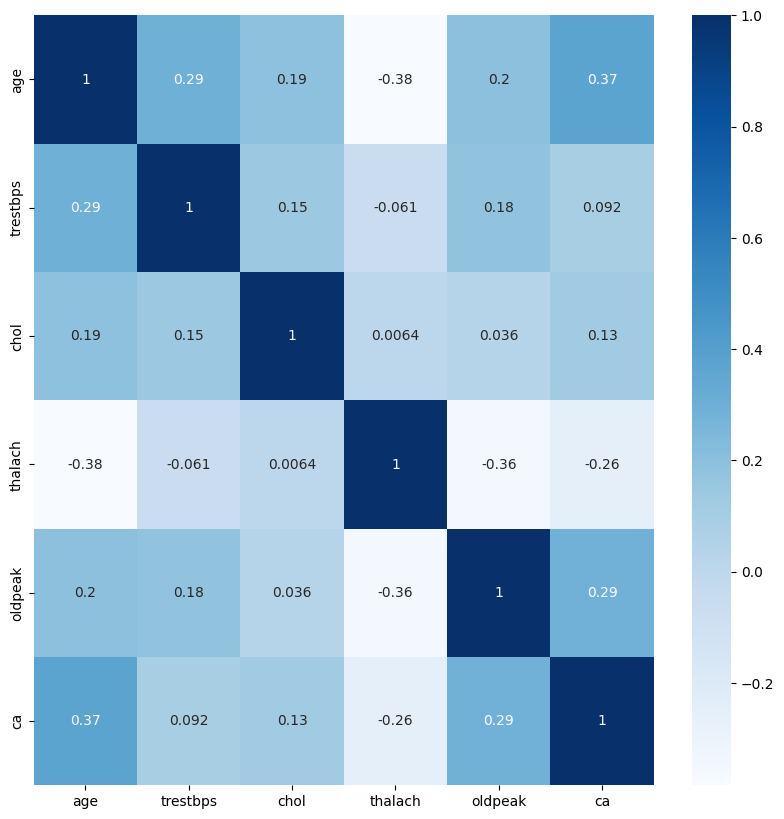

In [ ]:
X_nonan = df_nonan.drop('target', axis=1)
y_nonan = df_nonan['target']

fig = plt.figure(figsize=(10, 10))
datacorr = sns.heatmap(X_nonan[num_col].corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

Aparentemente, de acordo com a matriz de correlação, não há nenhuma dupla de atributos fortemente correlacionados (módulo da correlação > 0.5) no dataset sem a coluna 'ca'.

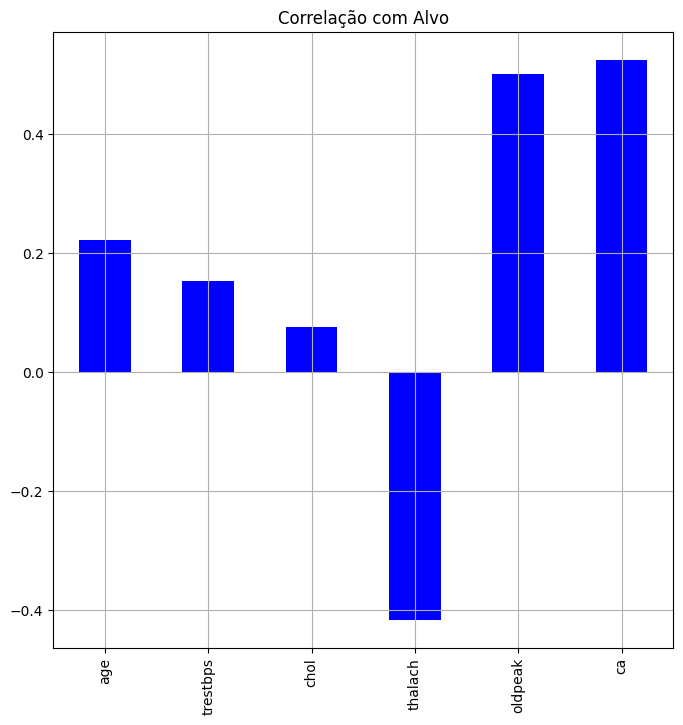

In [ ]:
fig = plt.figure(figsize=(8, 8))
df_nonan[num_col].corrwith(df_nonan['target']).plot(kind='bar', color='blue', grid=True)
plt.title('Correlação com Alvo')
plt.show()

## TODO: alterar essa desc
Repare que, quando incluimos o 'target' na matriz de correlação, podemos identificar uma alta correlação positiva entre ele e os atributos 'ca' e 'oldpeak'. Isso pode indicar que 'oldpeak' e 'ca' são indicativos consideráveis de um nível maior de doença cardíaca.

# Binarização das classes



Criando um dataframe de classe binária de cada um dos dois dataframes nossos (aqui, qualquer valor do target que não seja 0, torna-se 1):

In [ ]:
# Classe binária do df_noca (sem o atributo 'ca'):
df_noca_bin = df_noca.copy()
df_noca_bin['target'] = df_noca_bin['target'].apply(lambda x: 1 if x > 0 else 0)

# Classe binária do df_nonan (sem os objetos de valores nulos):
df_nonan_bin = df_nonan.copy()
df_nonan_bin['target'] = df_nonan_bin['target'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df_noca_bin['target'].value_counts()

,count
target,
1,509
0,411


In [ ]:
df_nonan_bin['target'].value_counts()

,count
target,
0,160
1,139


# Funções para extrair Métricas de Avaliação

In [ ]:
# Matriz de confusão:
def confusion_matrix(y_test, y_pred):
  conf = np.zeros((2,2))
  for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
      if y_pred[i] == 1:
        conf[0][0] += 1 # Verdadeiro Positivo
      else:
        conf[1][1] += 1 # Verdadeiro Negativo
    else:
      if y_pred[i] == 1:
        conf[1][0] += 1 # Falso Positivo
      else:
        conf[0][1] += 1 # Falso Negativo
  return conf

In [ ]:
# Função que calcula as quatro métricas de interesse, guardando e retornando-as
# em um dicionário
def metrics(conf_mat):
  vp = conf_mat[0][0]
  vn = conf_mat[1][1]
  fn = conf_mat[0][1]
  fp = conf_mat[1][0]

  acc = (vp + vn) / np.sum(conf_mat) # Acurácia
  sen = vp / (vp + fn) # Sensibilidade (Recall)
  pre = vp / (vp + fp) # Precisão
  f1 = 2 * (pre * sen) / (pre + sen) # F1-Score

  metrics = {
      'acurácia': acc,
      'sensibilidade': sen,
      'precisão': pre,
      'f1-score': f1
  }

  return metrics

## Treinamento e Teste dos Modelos:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from numpy import mean, std
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE

def classificacao_binaria(score_fn, X, y,
                  folds=5, plot=True, r=42):
    # Inicializa modelos:
    knn = KNeighborsClassifier(n_neighbors=5)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(X)*0.1), random_state=r)
    svm_linear = SVC(kernel='linear', C=1.0, random_state=r)
    svm_poly3 = SVC(kernel='poly', degree=3, random_state=r)
    mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=r, early_stopping=True)

    clfs = [knn, dt, svm_linear, svm_poly3, mlp]
    clfs_names = ['knn', 'dt', 'svm_linear', 'svm_poly3', 'mlp']

    # Prepara validação cruzada
    # Faz divisão do dataset em fold partes
    kf = KFold(n_splits=folds, shuffle=True, random_state=r)

    score_names = ['acurácia', 'sensibilidade', 'precisão', 'f1-score']

    # Itera para cada classificador fazendo treino e teste
    results = {c_name: {metric: [] for metric in score_names} for c_name in clfs_names}
    roc_data = {c_name: {'y_true': [], 'y_score': []} for c_name in clfs_names}
    for c, c_name in zip(clfs, clfs_names):
      for train_index, test_index in kf.split(X):
        # Separa conjunto de treino e teste
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        smote = SMOTE(sampling_strategy='minority')
        x_train, y_train = smote.fit_resample(x_train, y_train)

        # Faz o treino do modelo
        clf = c.fit(x_train, y_train)

        # Realiza predição no conjunto de teste
        y_pred = clf.predict(x_test)
        y_test = np.array(y_test)

        # Probabilidades ou valores para curva ROC
        if hasattr(clf, "predict_proba"):
            y_score = clf.predict_proba(x_test)[:, 1]
        else:
            y_score = clf.decision_function(x_test)

        # Calcula curva ROC
        roc_data[c_name]['y_true'].extend(y_test)
        roc_data[c_name]['y_score'].extend(y_score)

        # Calcula a métrica de desempenho
        conf_mat = confusion_matrix(y_test, y_pred)
        metrics = score_fn(conf_mat)

        for metric, value in metrics.items():
            results[c_name][metric].append(value)

    if not plot:
        return {'results': results, 'clfs':clfs}

    # faz o plot de desempenho dos classificadores
    n_metrics = len(score_names)
    fig, axs = plt.subplots(n_metrics, 1, figsize=(10, 5*n_metrics), sharey=True)
    if n_metrics == 1:
      axs = [axs]

    for ax, metric in zip(axs, score_names):
      means = [mean(results[name][metric]) for name in clfs_names]
      stds = [std(results[name][metric]) for name in clfs_names]
      ax.bar(range(1, len(clfs)+1), means, yerr=stds)
      ax.set_xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
      ax.set_title(f'Comparação dos classificadores - {metric.capitalize()}')
      ax.set_ylabel(metric.capitalize())
      ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Plotagem das curvas ROC agregadas
    plt.figure(figsize=(10, 8))
    for c_name in clfs_names:
        y_true = np.array(roc_data[c_name]['y_true'])
        y_score = np.array(roc_data[c_name]['y_score'])
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{c_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Linha de referência')
    plt.title('Curva ROC - Comparação entre Modelos')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.7)

    plt.tight_layout()
    plt.show()

    return {'results': results, 'clfs':clfs}

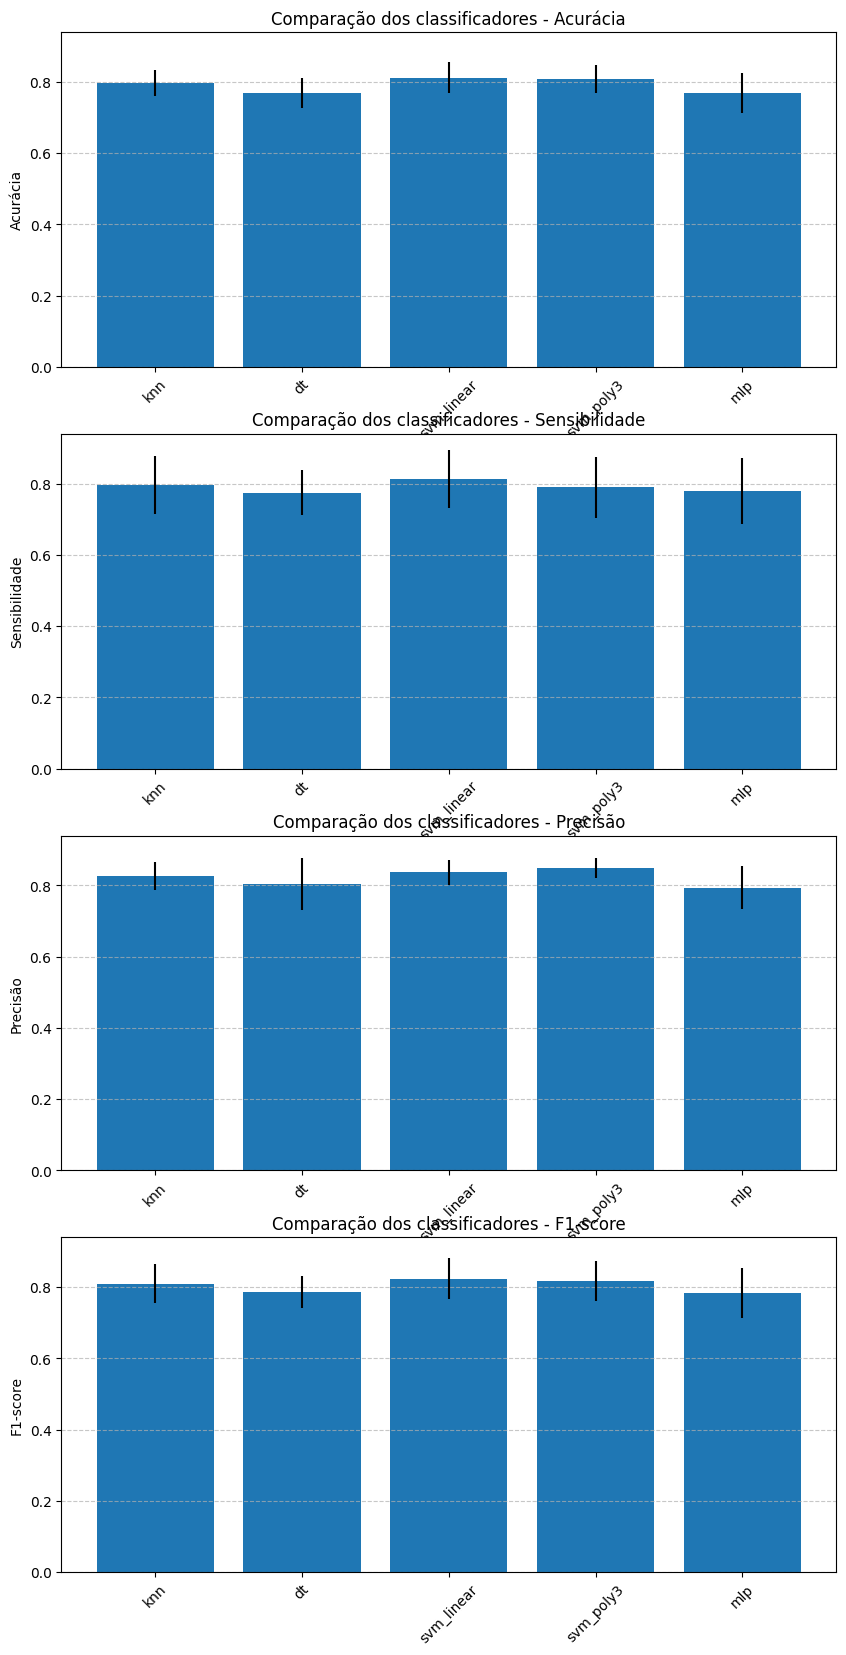

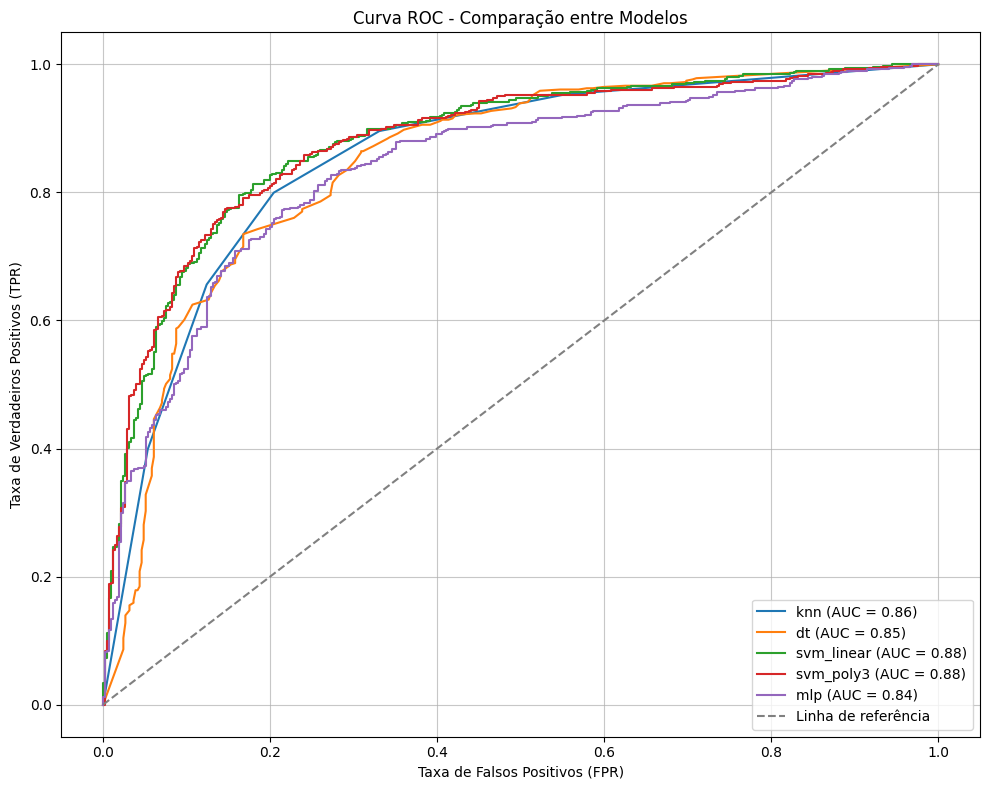

Classificador: knn
	Média de acurácia: 79.78 +- 3.61
	Média de sensibilidade: 79.66 +- 8.18
	Média de precisão: 82.73 +- 3.91
	Média de f1-score: 80.97 +- 5.41
Classificador: dt
	Média de acurácia: 76.85 +- 4.18
	Média de sensibilidade: 77.48 +- 6.24
	Média de precisão: 80.41 +- 7.32
	Média de f1-score: 78.58 +- 4.51
Classificador: svm_linear
	Média de acurácia: 81.20 +- 4.29
	Média de sensibilidade: 81.30 +- 8.21
	Média de precisão: 83.71 +- 3.52
	Média de f1-score: 82.37 +- 5.72
Classificador: svm_poly3
	Média de acurácia: 80.87 +- 3.96
	Média de sensibilidade: 78.92 +- 8.47
	Média de precisão: 85.00 +- 2.82
	Média de f1-score: 81.65 +- 5.67
Classificador: mlp
	Média de acurácia: 76.96 +- 5.62
	Média de sensibilidade: 77.90 +- 9.33
	Média de precisão: 79.37 +- 6.12
	Média de f1-score: 78.44 +- 6.99


In [ ]:
# Para dataframe de classe binária sem o 'ca':
X_noca_bin = df_noca_bin.drop('target', axis=1)
y_noca_bin = df_noca_bin['target']
results = classificacao_binaria(metrics, X_noca_bin, y_noca_bin, folds=10, plot=True)

for clf_name, metric in results['results'].items():
  print(f'Classificador: {clf_name}')
  for metric_name, values in metric.items():
    print(f'\tMédia de {metric_name}: {100*mean(values):.2f} +- {100*std(values):.2f}')

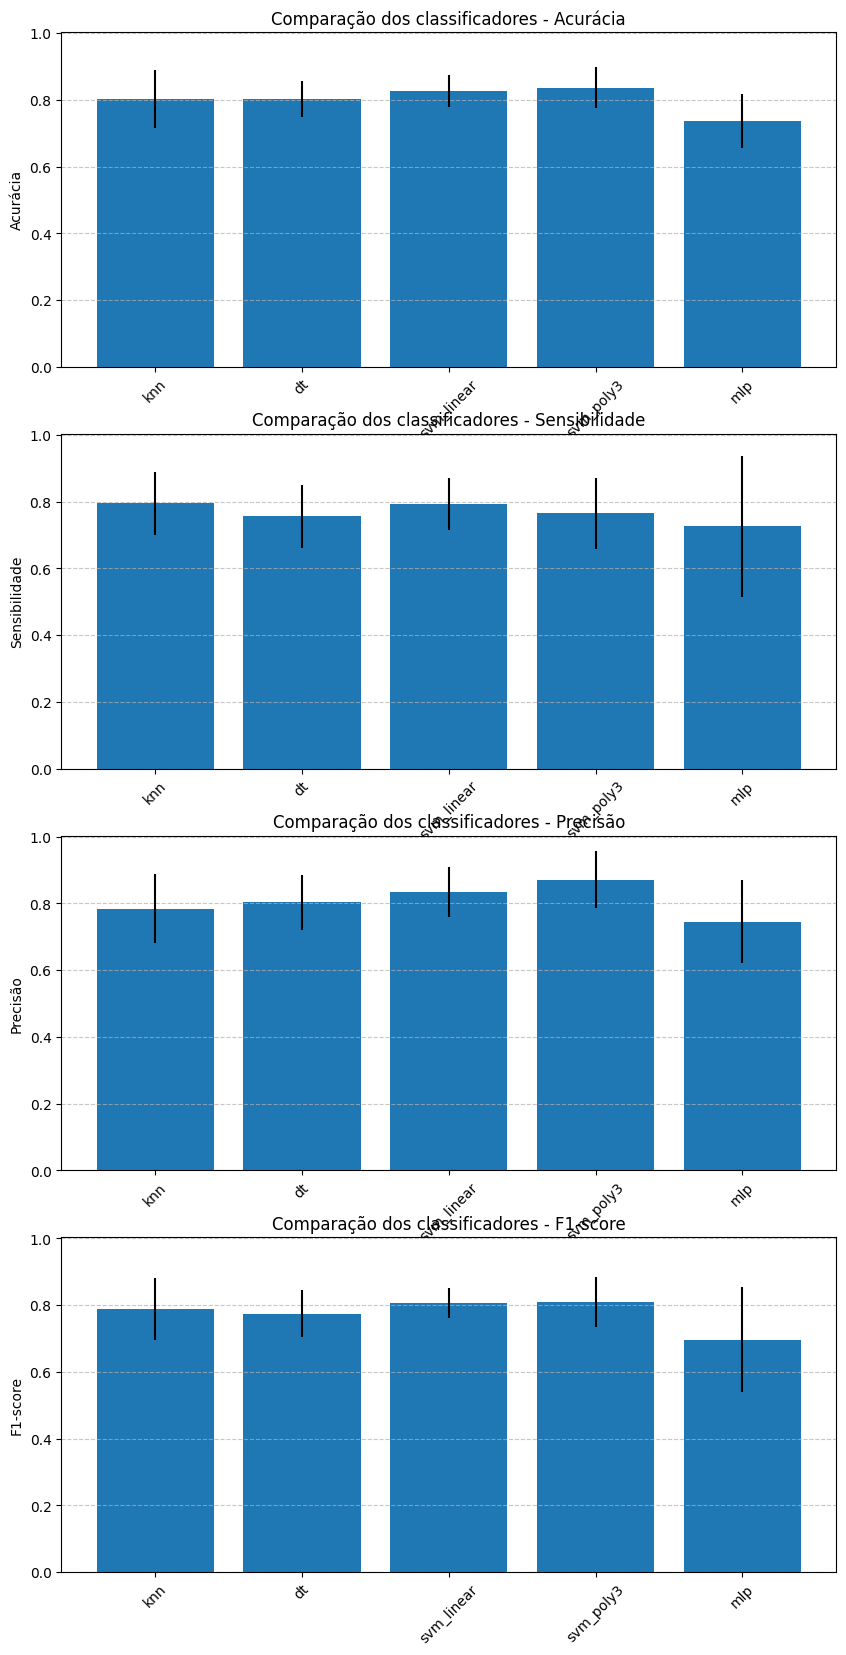

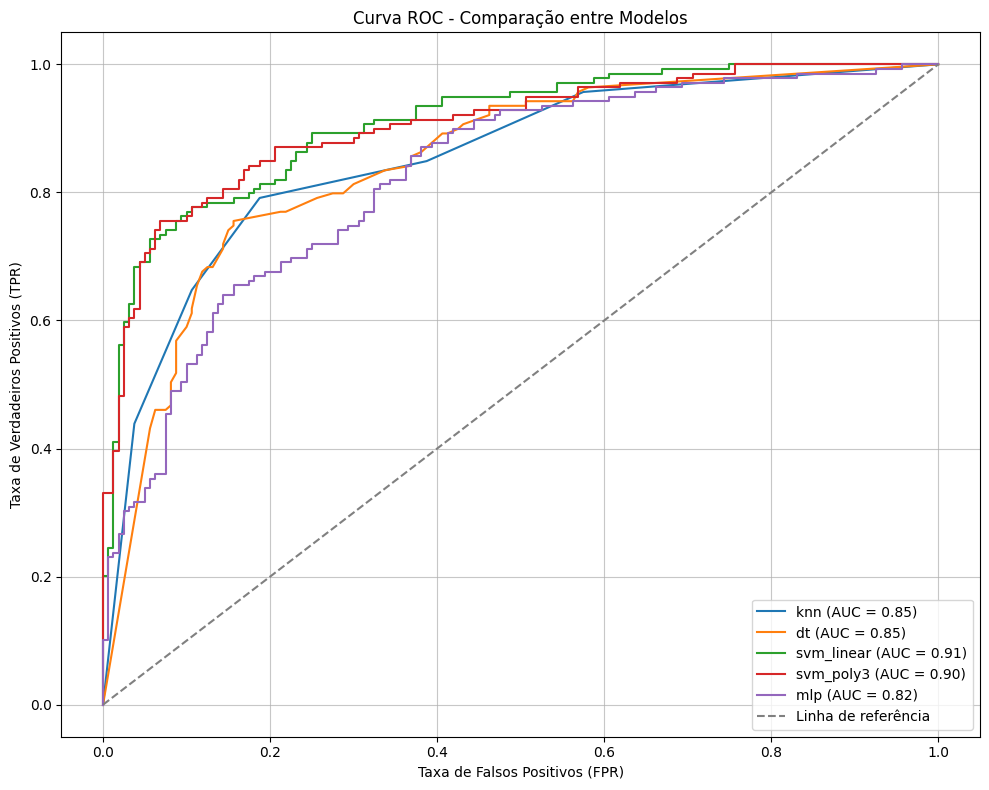

Classificador: knn
	Média de acurácia: 80.25 +- 8.66
	Média de sensibilidade: 79.53 +- 9.44
	Média de precisão: 78.35 +- 10.28
	Média de f1-score: 78.74 +- 9.25
Classificador: dt
	Média de acurácia: 80.28 +- 5.44
	Média de sensibilidade: 75.62 +- 9.48
	Média de precisão: 80.25 +- 8.23
	Média de f1-score: 77.44 +- 7.02
Classificador: svm_linear
	Média de acurácia: 82.61 +- 4.89
	Média de sensibilidade: 79.29 +- 7.71
	Média de precisão: 83.26 +- 7.48
	Média de f1-score: 80.68 +- 4.51
Classificador: svm_poly3
	Média de acurácia: 83.62 +- 6.21
	Média de sensibilidade: 76.47 +- 10.57
	Média de precisão: 87.09 +- 8.43
	Média de f1-score: 80.81 +- 7.47
Classificador: mlp
	Média de acurácia: 73.60 +- 8.04
	Média de sensibilidade: 72.55 +- 21.02
	Média de precisão: 74.49 +- 12.44
	Média de f1-score: 69.55 +- 15.71


In [ ]:
# Para dataframe de classe binária sem os valores nulos:
X_nonan_bin = df_nonan_bin.drop('target', axis=1)
y_nonan_bin = df_nonan_bin['target']
results = classificacao_binaria(metrics, X_nonan_bin, y_nonan_bin, folds=10, plot=True)

for clf_name, metric in results['results'].items():
  print(f'Classificador: {clf_name}')
  for metric_name, values in metric.items():
    print(f'\tMédia de {metric_name}: {100*mean(values):.2f} +- {100*std(values):.2f}')

Para os dois dataframes binários, plotamos as curvas ROC de cada modelo. E nesses casos, destacam-se os modelos SVM linear e SVM polinomial com grau 3.
O SVM linear teve uma pequena vantagem sobre o polinomial no dataset que retiramos os valores nulos (df_nonan_bin).